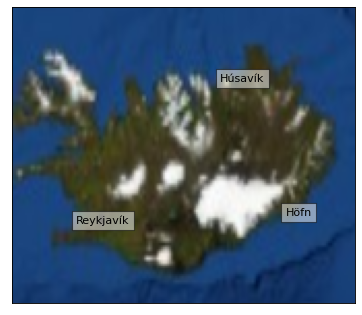

In [11]:
names = [u"Reykjavík", u"Höfn", u"Húsavík"]
lats = [64.133333, 64.25, 66.05]
lons = [-21.933333, -15.216667, -17.316667]

## Step 1: draw a map using matplotlib/Basemap
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# predefined dpi
FIGDPI=80

# set dpi of figure, so that all calculations use this value
plt.gcf().set_dpi(FIGDPI)

M = Basemap(projection='merc',resolution='c',
            llcrnrlat=63,urcrnrlat=67,
            llcrnrlon=-24,urcrnrlon=-13)

x, y = M(lons, lats) # transform coordinates according to projection
boxes = []
for xa, ya, name in zip(x, y, names):
    box = plt.text(xa, ya, name,
        bbox=dict(facecolor='white', alpha=0.5))
    boxes.append(box)

M.bluemarble() # a bit fuzzy at this resolution...

# predefine padding in inches
PADDING = 2
# force dpi to same value you used in your calculations
plt.savefig('test_test.png', bbox_inches="tight", pad_inches=0,dpi=FIGDPI)

# document shift due to loss of white space and added padding
origin = plt.gca().transAxes.transform((0,0))
padding = [FIGDPI*PADDING,FIGDPI*PADDING]

In [12]:
F = plt.gcf() # get current figure
R = F.canvas.get_renderer()
midpoints = []
for box in boxes:
    bb = box.get_window_extent(renderer=R)
    midpoints.append((int((bb.p0[0] + bb.p1[0]) / 2),
            int((bb.p0[1] + bb.p1[1]) / 2)))

<Figure size 640x480 with 0 Axes>

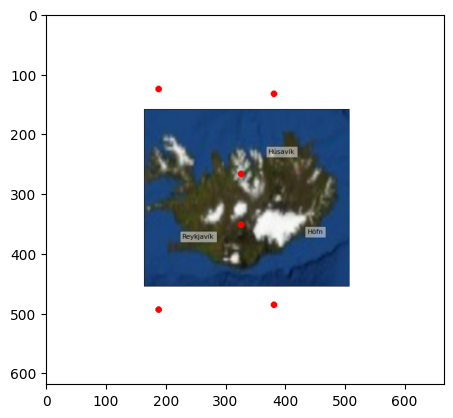

In [13]:
from PIL import Image, ImageDraw

im = Image.open("test.png")
draw = ImageDraw.Draw(im)
for x, y in midpoints:
    # y = im.size[1] - y # PIL counts rows from top not bottom
    draw.ellipse((x-5, y-5, x+5, y+5), fill="#ff0000")
im.save("test_test.png", "PNG")
plt.imshow(im)

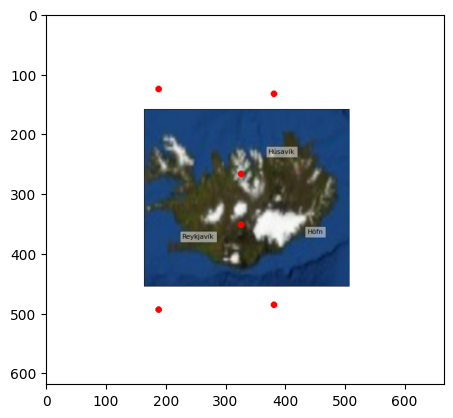

In [14]:
plt.imshow(Image.open("./test_test.png"))